In [119]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


from sklearn.tree import DecisionTreeClassifier,plot_tree
 
import os, time, gc
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [120]:
mobile = pd.read_csv('train.csv')


In [121]:

print("Shape of the data =", mobile.shape)
print("\n")
mobile.head()
print("\n")
mobile.info()

Shape of the data = (2000, 21)




,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_

In [122]:
#As "price_range" column has categorical data
df = mobile.iloc[:, :-1]
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0


In [123]:
#Coversion of data-type to int16 to reduce memory usage
print("Maximum possible data in a column to check the range of data-type =", mobile.max().max())
mobile = mobile.astype('int16')
print("Memory Usage after conversion to int16 =", mobile.memory_usage().sum()) 
print("\n")
mobile.info()

Maximum possible data in a column to check the range of data-type = 3998.0
Memory Usage after conversion to int16 = 84128


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int16
 1   blue           2000 non-null   int16
 2   clock_speed    2000 non-null   int16
 3   dual_sim       2000 non-null   int16
 4   fc             2000 non-null   int16
 5   four_g         2000 non-null   int16
 6   int_memory     2000 non-null   int16
 7   m_dep          2000 non-null   int16
 8   mobile_wt      2000 non-null   int16
 9   n_cores        2000 non-null   int16
 10  pc             2000 non-null   int16
 11  px_height      2000 non-null   int16
 12  px_width       2000 non-null   int16
 13  ram            2000 non-null   int16
 14  sc_h           2000 non-null   int16
 15  sc_w           2000 non-null   int16
 16  talk_tim

In [124]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [125]:
for col_details in mobile.columns:
  col_values = len(mobile[col_details].unique())
  print(f"Feature '{col_details}' has '{col_values}' unique values")

Feature 'battery_power' has '1094' unique values
Feature 'blue' has '2' unique values
Feature 'clock_speed' has '4' unique values
Feature 'dual_sim' has '2' unique values
Feature 'fc' has '20' unique values
Feature 'four_g' has '2' unique values
Feature 'int_memory' has '63' unique values
Feature 'm_dep' has '2' unique values
Feature 'mobile_wt' has '121' unique values
Feature 'n_cores' has '8' unique values
Feature 'pc' has '21' unique values
Feature 'px_height' has '1137' unique values
Feature 'px_width' has '1109' unique values
Feature 'ram' has '1562' unique values
Feature 'sc_h' has '15' unique values
Feature 'sc_w' has '19' unique values
Feature 'talk_time' has '19' unique values
Feature 'three_g' has '2' unique values
Feature 'touch_screen' has '2' unique values
Feature 'wifi' has '2' unique values
Feature 'price_range' has '4' unique values


In [126]:
#To display out categorical column and numerical column
categorical_feature = []
numerical_feature = []

for col_details in mobile.columns:
  col_values = len(mobile[col_details].unique())
  if col_values < 5:
    categorical_feature.append(col_details)
  else:
    numerical_feature.append(col_details)
    
    
print("Categorical Features =", categorical_feature)
print("Numerical Features =", numerical_feature)

Categorical Features = ['blue', 'clock_speed', 'dual_sim', 'four_g', 'm_dep', 'three_g', 'touch_screen', 'wifi', 'price_range']
Numerical Features = ['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


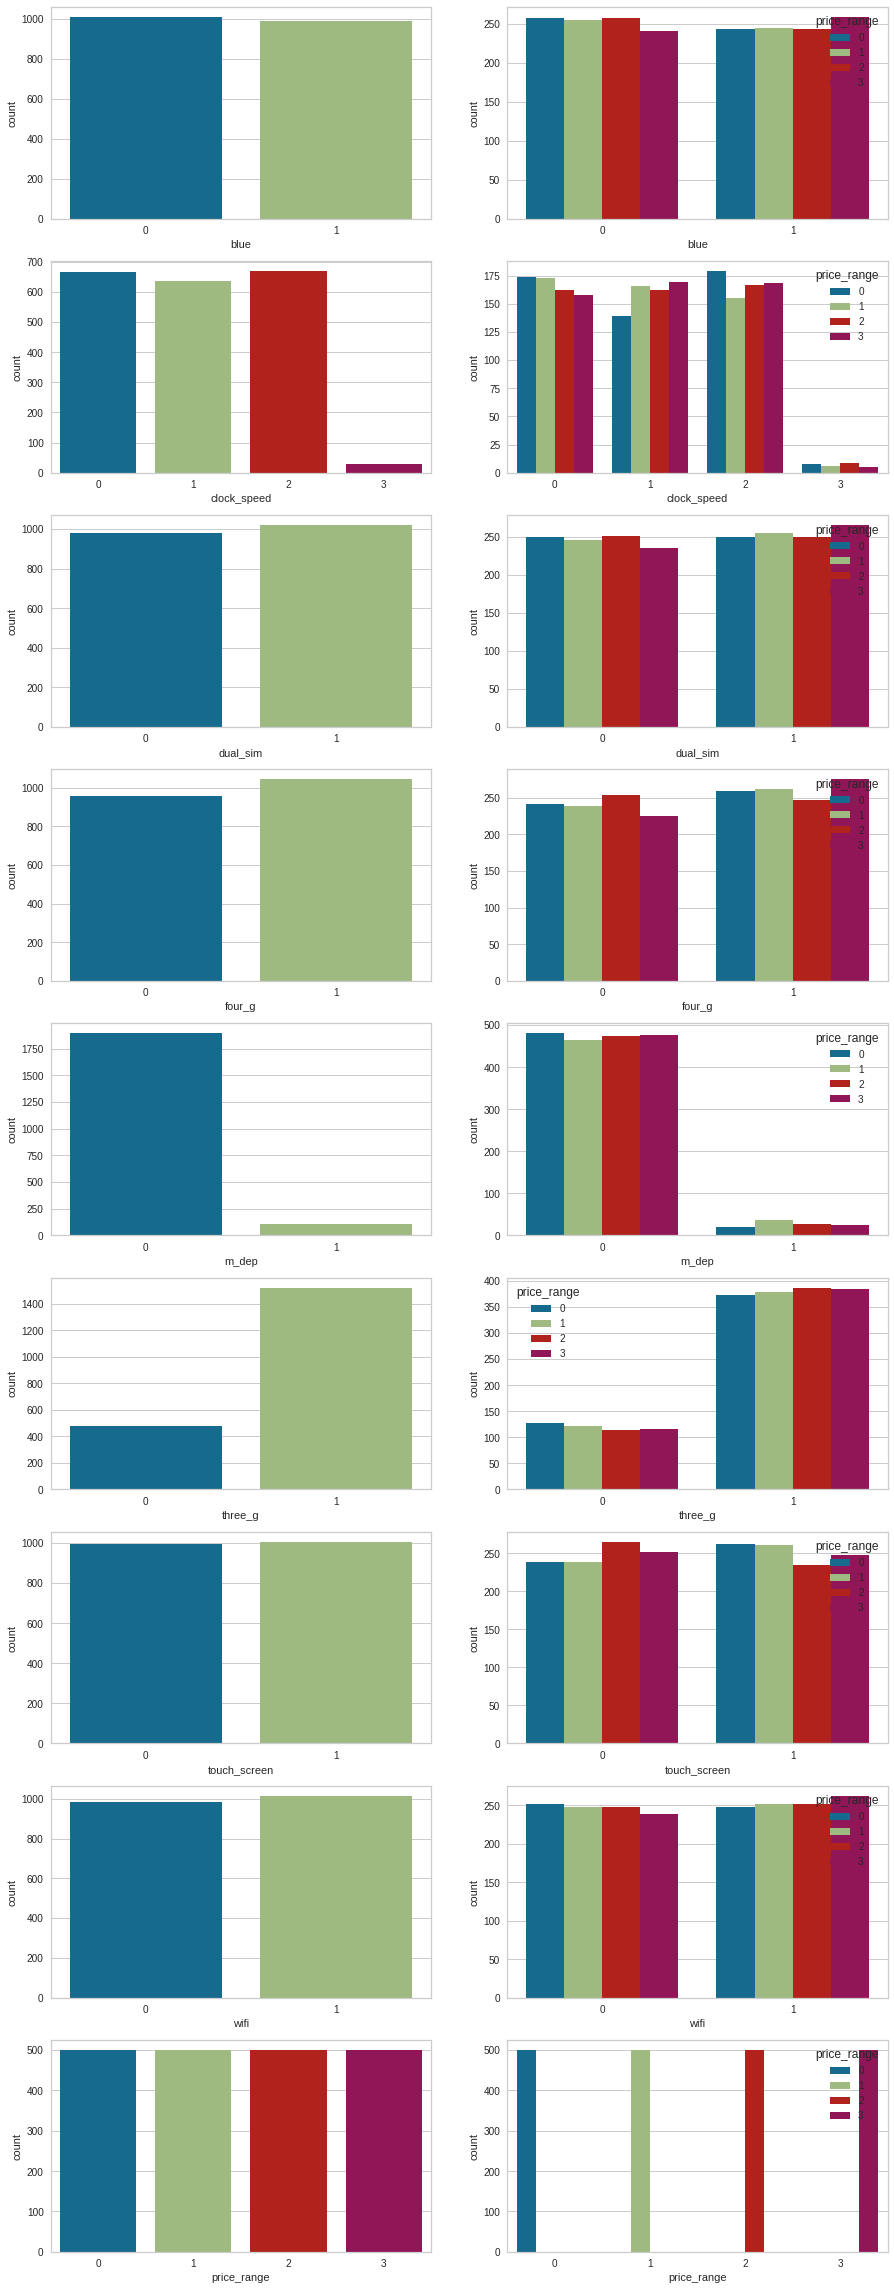

In [127]:
#To view categorical feature, Subplot Function takes three arguments as row, column and  index of current-plot
fig = plt.figure(figsize = (15,60));
for index, feature in enumerate(categorical_feature):
  plt.subplot(13, 2, index*2+1);
  sns.countplot(x = feature, data = mobile);
  plt.subplot(13, 2, index*2+2);
  sns.countplot(x = feature, data = mobile, hue='price_range');
plt.show();

# DROP NULL VALUES

In [128]:
mobile.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [129]:
mobile1=mobile.copy()

In [130]:
mobile1= mobile1.dropna(axis=0)
mobile1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# replace it mean, median, mode, standard deviation, min & max of that column

In [131]:
mobile2=mobile.copy()
missing= ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc',
'px_height'
,'px_width'
,'ram'
,'sc_h'
,'sc_w'
,'talk_time'
,'three_g'          
,'touch_screen'     
,'wifi'             
,'price_range'] #list all the missing values columns
for i in missing:
    mobile2[i]=mobile2[i].fillna(mobile2[i].median())# now all the missing data in the column is replace by its column mean 

# Normalize 

In [132]:
dataf=((mobile-mobile.min())/(mobile.max()-mobile.min()))*20

In [133]:
dataf.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1079,18.597194,20.0,0.000000,20.0,1.052632,0.0,6.774194,0.0,16.500000,20.000000,...,12.275510,12.443258,6.552646,14.285714,7.777778,16.666667,0.0,20.0,0.0,13.333333
731,17.448230,20.0,13.333333,0.0,2.105263,0.0,15.161290,0.0,7.500000,0.000000,...,3.438776,11.802403,8.818813,17.142857,14.444444,12.222222,0.0,20.0,20.0,13.333333
435,6.052104,20.0,0.000000,0.0,0.000000,0.0,15.483871,0.0,9.000000,2.857143,...,2.326531,7.449933,0.972742,17.142857,0.000000,0.000000,20.0,0.0,0.0,0.000000
451,6.292585,20.0,6.666667,0.0,0.000000,20.0,16.774194,0.0,4.500000,5.714286,...,6.948980,7.343124,8.786745,15.714286,8.888889,18.888889,20.0,0.0,20.0,6.666667
204,12.972612,20.0,13.333333,0.0,6.315789,0.0,19.032258,0.0,14.666667,14.285714,...,7.244898,7.369826,12.939604,20.000000,16.666667,6.666667,20.0,0.0,0.0,13.333333


# Calculating Z-score

In [134]:
from scipy import stats
stats.zscore(mobile.price_range)

0      -0.447214
1       0.447214
2       0.447214
3       0.447214
4      -0.447214
          ...   
1995   -1.341641
1996    0.447214
1997    1.341641
1998   -1.341641
1999    1.341641
Name: price_range, Length: 2000, dtype: float64

In [135]:
import numpy as np
mean = np.mean(mobile.price_range)
std = np.std(mobile.price_range)

In [136]:
def z_score(value, mean, std):
    return (value-mean)/ std

In [137]:
import random
values = []
#randomly select values from the price column
for i in list(range(0, 5)):
    value = random.choice(mobile.price_range)
    values.append(value)
    
    
print(values)

[1, 3, 1, 3, 1]


In [138]:
for val in values:
    z = z_score(val, mean, std)
    print(z)

-0.4472135954999579
1.3416407864998738
-0.4472135954999579
1.3416407864998738
-0.4472135954999579


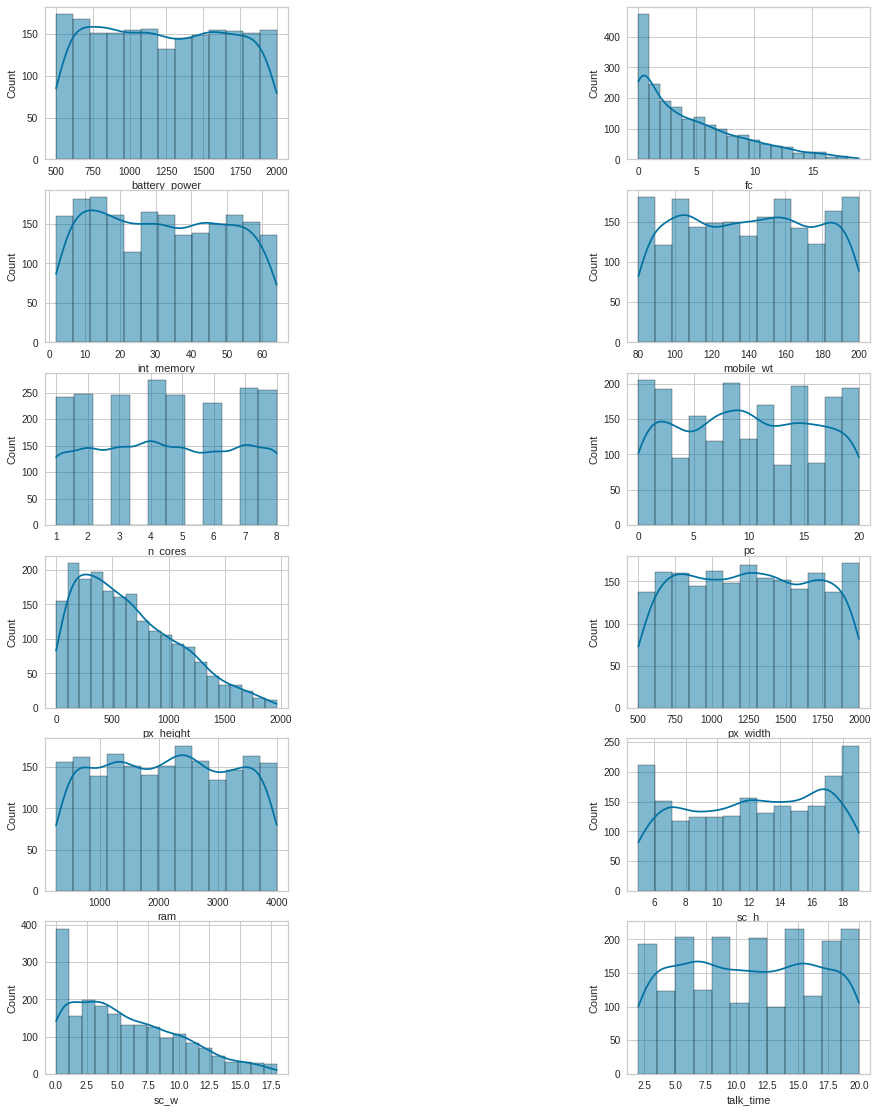

In [139]:
#Numerical Feature density plot-line using histogram
fig = plt.figure(figsize = (20,60));
for index, feature in enumerate(numerical_feature):
  plt.subplot(18, 4, index*2+1);
  sns.histplot(mobile[feature], kde = True);
plt.show()

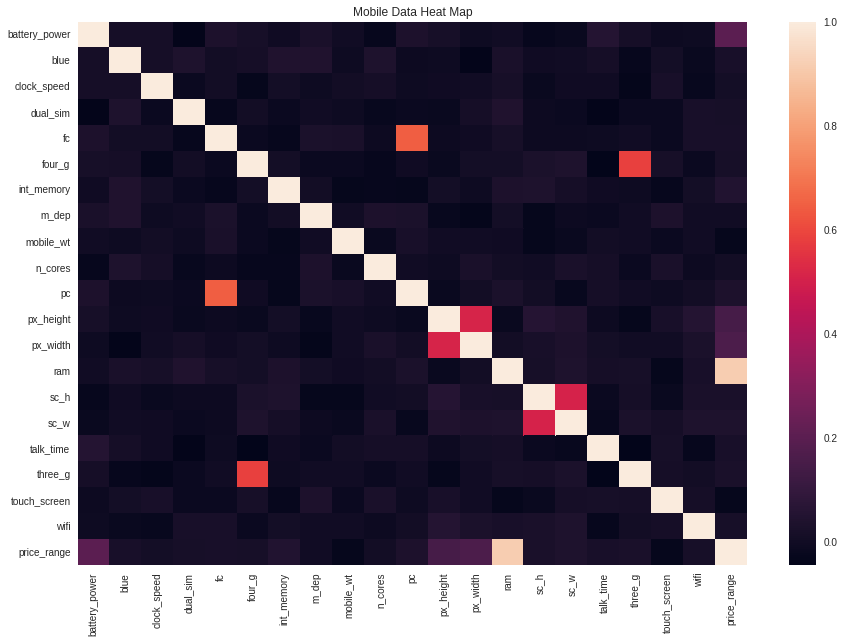

In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(mobile.corr());
plt.title("Mobile Data Heat Map");

# Learning algorithim

In [141]:
X = mobile.drop('price_range', axis=1)
y = mobile['price_range']
X.shape

(2000, 20)

In [142]:
sc = StandardScaler()
scaled_mobile_data =sc.fit_transform(X)
scaled_mobile_data.shape

(2000, 20)

In [143]:
kmeans = KMeans(n_clusters=7, max_iter=100)
kmeans.fit(scaled_mobile_data)

KMeans(max_iter=100, n_clusters=7)

In [144]:
kmeans.cluster_centers_

array([[ 1.00802518e-01,  1.79820312e-01, -3.41020982e-02,
        -1.32099318e-04,  1.30832170e-01, -6.19252009e-02,
         2.18781949e-02,  4.22704679e+00,  8.69163003e-03,
         1.31272397e-01,  1.16471212e-01, -1.06688374e-01,
        -1.45336198e-01,  3.06075236e-02, -1.44434740e-01,
        -5.26401649e-02, -6.24591520e-02,  6.22044292e-03,
         1.44946005e-01,  4.86840166e-03],
       [-7.10599259e-02,  1.00005000e-02, -1.92400962e-01,
        -9.59403957e-02, -4.17639518e-01,  3.67596410e-01,
         1.23937475e-01, -2.36571784e-01,  4.34989141e-02,
         4.28851738e-02, -3.43598193e-01,  1.23241692e+00,
         1.01306001e+00,  2.27264773e-02,  2.87909691e-01,
         2.07303759e-01, -1.21122241e-01,  5.59640631e-01,
         6.45139818e-02,  1.91146938e-01],
       [-7.14972896e-02,  4.83505002e-02,  8.73070602e-02,
         7.55003547e-03, -3.54714613e-01,  3.79179622e-01,
         8.31297876e-02, -2.36571784e-01, -2.03827011e-01,
         7.55117412e-02, -2.5

In [145]:
kmeans.n_iter_

31

In [146]:
kmeans.n_features_in_

20

In [147]:
cl = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == cl)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 275 out of 2000 samples were correctly labeled.


In [148]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.14


In [149]:
scaled_mobile_data[0]

array([-0.90259726, -0.9900495 ,  1.14183232, -1.01918398, -0.76249466,
       -1.04396559, -1.38064353, -0.23657178,  1.34924881, -1.10197128,
       -1.3057501 , -1.40894856, -1.14678403,  0.39170341, -0.78498329,
        0.2831028 ,  1.46249332, -1.78686097, -1.00601811,  0.98609664])

In [150]:
sa = silhouette_score(scaled_mobile_data, cl)
print("Silhouette Score =", sa)

Silhouette Score = 0.06107524475193779


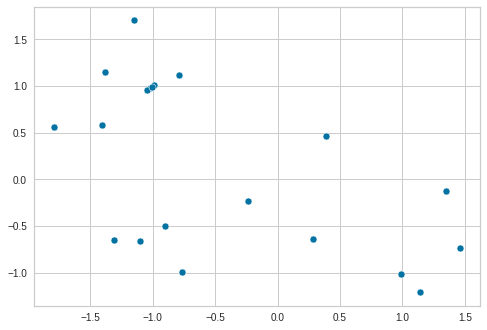

In [151]:
sns.scatterplot(x=scaled_mobile_data[0], y=scaled_mobile_data[1]);

In [152]:
sse=[]
s_score=[]
max_k=9
for n in range(2, max_k):
  model =KMeans(n_clusters=n, max_iter=100)
  model.fit(scaled_mobile_data)
  sse.append(model.inertia_)
  sc=silhouette_score(scaled_mobile_data, model.labels_, sample_size=1000)
  s_score.append(sc)

KMeans(max_iter=100, n_clusters=2)

KMeans(max_iter=100, n_clusters=3)

KMeans(max_iter=100, n_clusters=4)

KMeans(max_iter=100, n_clusters=5)

KMeans(max_iter=100, n_clusters=6)

KMeans(max_iter=100, n_clusters=7)

KMeans(max_iter=100)

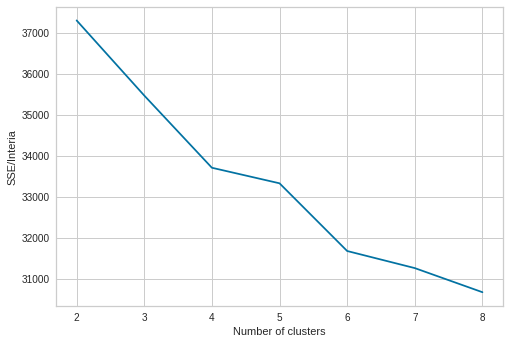

In [153]:
#Plotting Silhouette Score
plt.plot(range(2, max_k), sse)
plt.xticks(range(2, max_k))
plt.xlabel("Number of clusters")
plt.ylabel("SSE/Interia")
plt.show();

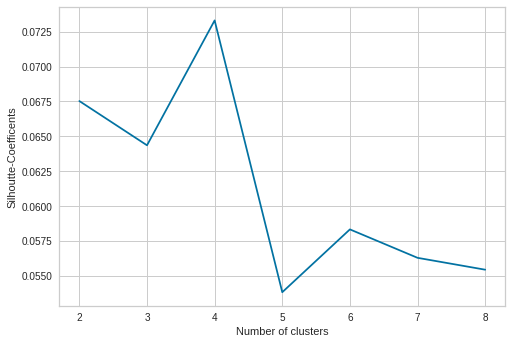

In [154]:
plt.plot(range(2, max_k), s_score)
plt.xticks(range(2, max_k))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte-Coefficents")
plt.show();

In [155]:
sample_value = silhouette_samples(X, cl)
print("Sample Silhouette value =", sample_value)

Sample Silhouette value = [ 0.00288638  0.03807894  0.04420705 ... -0.07715839  0.02273744
 -0.05373077]


In [156]:
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

In [163]:
view_plt = SilhouetteVisualizer(model, colors='yellowbrick')

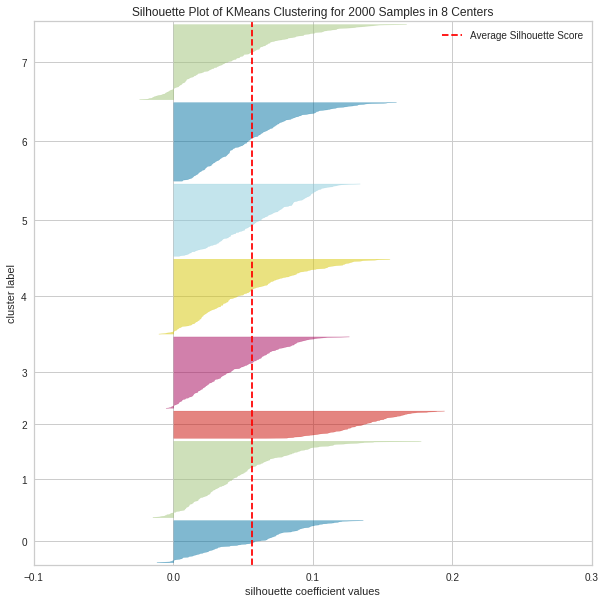

In [164]:
fig=plt.figure(figsize=(10, 10));
view_plt.fit(scaled_mobile_data);
view_plt.show();

In [165]:
#To perform Sampling
X_train, X_test, y_train,y_test = train_test_split(
                                                   X,
                                                   y,
                                                   test_size = 0.3,
                                                   stratify = y,
                                                   shuffle= True)

X_train.shape
X_test.shape   

(1400, 20)

(600, 20)

In [166]:
dtree = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [167]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [168]:
y_te = dtree.predict(X_test)
y_te

array([0, 3, 1, 3, 3, 0, 2, 0, 0, 3, 3, 0, 1, 0, 1, 1, 3, 3, 3, 2, 0, 0,
       3, 2, 1, 3, 2, 1, 0, 3, 0, 0, 0, 2, 0, 0, 3, 0, 2, 1, 1, 1, 3, 1,
       0, 1, 3, 3, 1, 1, 3, 2, 0, 1, 2, 3, 2, 0, 3, 0, 3, 0, 3, 0, 1, 2,
       1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 3, 2, 3, 2, 2, 2, 1, 0, 3, 1,
       3, 2, 3, 0, 1, 3, 3, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 3, 3,
       0, 3, 2, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0, 2, 1, 2, 3, 2, 3, 3, 2, 1,
       2, 3, 3, 3, 0, 2, 3, 3, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 3, 2,
       1, 1, 3, 0, 0, 0, 3, 3, 1, 2, 3, 2, 3, 0, 0, 2, 2, 2, 2, 1, 1, 2,
       3, 2, 1, 1, 0, 0, 1, 1, 1, 3, 3, 1, 3, 0, 3, 0, 0, 1, 3, 1, 3, 3,
       0, 3, 3, 0, 2, 3, 0, 2, 0, 1, 0, 0, 3, 2, 0, 0, 2, 2, 3, 0, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 1, 0, 0, 3, 0, 2, 0, 2, 3, 3, 3, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 3, 2, 3, 3, 0, 0, 0, 1, 2,
       3, 2, 3, 3, 3, 2, 2, 3, 2, 1, 1, 0, 2, 3, 3, 1, 3, 2, 0, 1, 2, 0,
       3, 0, 3, 3, 0, 0, 3, 0, 2, 1, 0, 2, 1, 3, 2,

In [169]:
np.sum((y_test == y_te))/y_test.size

0.8233333333333334

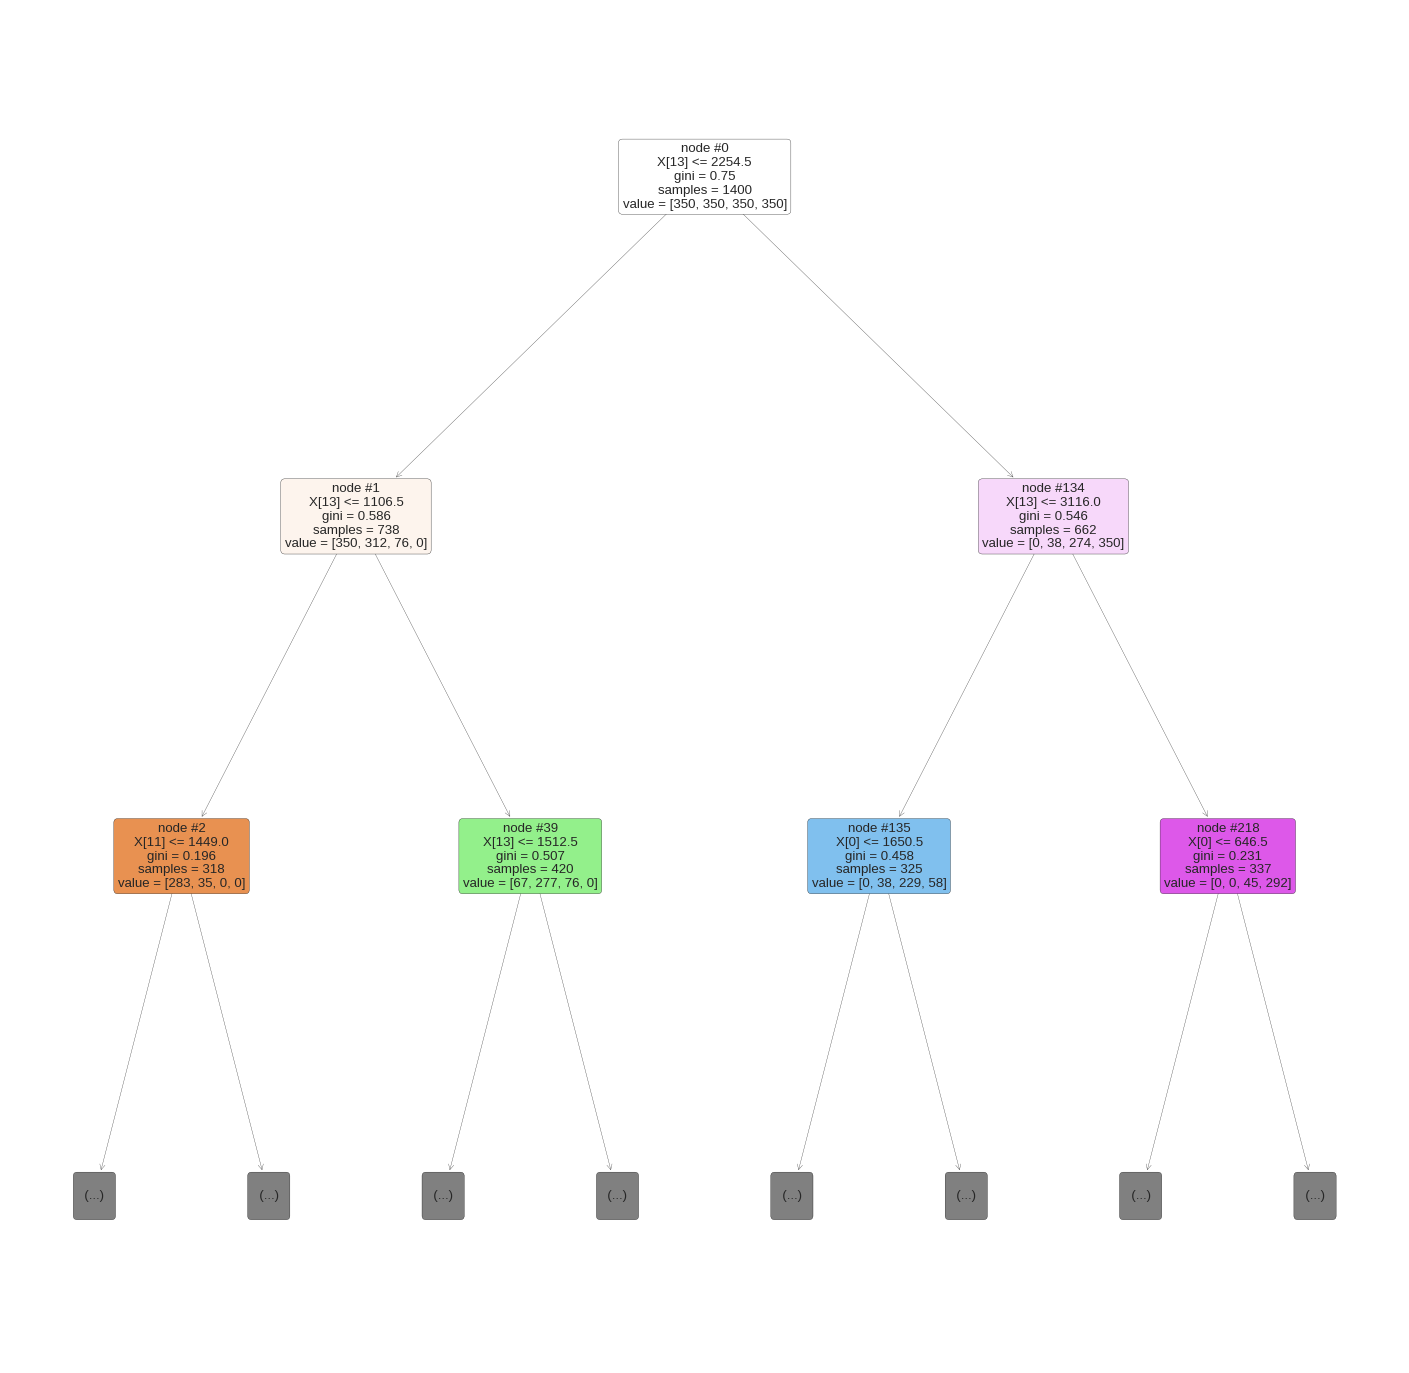

In [170]:
plt.figure(figsize=(25,25))
plot_tree(dtree, max_depth = 2,
          rounded = True,
          filled = True,
          impurity = True,
          node_ids = True)
plt.show;

In [171]:
from sklearn.metrics import confusion_matrix

In [172]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model


In [173]:
confusion_matrix(y_test, y_te)

array([[130,  20,   0,   0],
       [ 16, 114,  20,   0],
       [  0,  14, 116,  20],
       [  0,   0,  16, 134]])

In [175]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_te))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       150
           1       0.77      0.76      0.77       150
           2       0.76      0.77      0.77       150
           3       0.87      0.89      0.88       150

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

